* Jonathan Leeper
* Week 9 & 10 - Milestone 5

# <center><b>Milestone 2: Flat File Source Editing</b></center>

## 1st step: Removing Region-Specific Games

Within this step, it is important to distinguish what would be considered a game within the dataset and a game that is offered in another region. Within the flat file, I was able to find 7 different additions to the header to distinguish where the item was released. However, with each of these releases, they are similar. For example, Mafia: Definitive Edition has a seperate entry for an EU and a JP release. This contains all of the same information, which can be consolidated into one. The Wikipedia article I have selected for this exercise contains the release date for those games that do not contain the same release date for all different versions, as well, so it can all be moved into a single row.

The 7 different entries that need to be removed is <b>EU</b>, <b>Asia</b>, <b>JP</b>, <b>CN</b>, <b>HK/TW</b>, <b>SEA</b>, & <b>DE</b>.

In [1]:
import pandas as pd

df = pd.read_csv('playstation_4_games.csv')

In [2]:
print(df[['GameName']].head(2))

substrings = ['(EU)', '(Asia)', '(JP)', '(CN)', '(HK/TW)', '(SEA)', '(DE)']

pattern = '|'.join(substrings)

df = df[~df['GameName'].str.contains(pattern)]

print(df[['GameName']].head(2))

               GameName
0       Q*Bert Rebooted
1  Q*Bert Rebooted (EU)
          GameName
0  Q*Bert Rebooted
2       Q.U.B.E. 2


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_5600\1256914890.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['GameName'].str.contains(pattern)]


As seen above, we were able to remove the second record within the dataframe - this was Q*Bert Rebooted (EU). It has been replaced by Q.U.B.E. 2 in the records.

## 2nd Step: Properly converting is_Digital_game & is_Physical_game

One thing I noticed within this dataset is that is_Digital_game & is_Physical_game are incorrect. There is a medium field that contains the record of if the game is digital only, physical only, or physical & digital. I want to properly set these as 1 or 0 within this field for each record.

In [3]:
df['Medium'] = df['Medium'].fillna('')

df['is_Digital_game'] = df['Medium'].apply(lambda x: 1 if 'Digital' in x else 0)
df['is_Physical_game'] = df['Medium'].apply(lambda x: 1 if 'Physical' in x else 0)

print(df[['GameName', 'Medium', 'is_Digital_game', 'is_Physical_game']].head())

                  GameName                Medium  is_Digital_game  \
0          Q*Bert Rebooted                                      0   
2               Q.U.B.E. 2          Digital only                1   
3  Q.U.B.E. Director's Cut          Digital only                1   
4              Quake (PS4)  Physical and Digital                1   
5          Quantic Pinball                                      0   

   is_Physical_game  
0                 0  
2                 0  
3                 0  
4                 1  
5                 0  


As you can see above, both is_Digital_game & is_Physical_game have been properly updated to contain the correct outcome. However, I have noticed another interesting outcome from this. QBert Rebooted has 0 in both is_Digital_game and is_Physical_game. This is because this game has been de-listed, and cannot be purchased. For QBert, this is because the game is only available within a bundle on the Playstation Store.

## 3rd Step: Removing Unreleased Games

Within the dataset I have, there is no information for games released after the dataset was released - this cutoff is late 2021. Due to this, I am removing them from the dataset as I do not have the full information from here. This may be changed at a later date as Wikipedia will have the full information needed, but for this current dataset I would like to remove them for clarity on what to modify.

In [4]:
print(df[['GamePSID', 'GameName', 'ReleaseDate']].head())

df['GamePSID'] = df['GamePSID'].astype(str)

df = df[~df['GamePSID'].str.contains('-')]

print(df[['GamePSID', 'GameName', 'ReleaseDate']].head())

   GamePSID                 GameName ReleaseDate
0      3045          Q*Bert Rebooted  2015-02-17
2      6703               Q.U.B.E. 2  2018-03-13
3      3403  Q.U.B.E. Director's Cut  2015-07-21
4     13176              Quake (PS4)  2021-08-19
5     -2913          Quantic Pinball         NaN
  GamePSID                 GameName ReleaseDate
0     3045          Q*Bert Rebooted  2015-02-17
2     6703               Q.U.B.E. 2  2018-03-13
3     3403  Q.U.B.E. Director's Cut  2015-07-21
4    13176              Quake (PS4)  2021-08-19
8    12156          Quantum Replica  2021-05-14


As you can see, within the first 5 entries, Quantic Pinball was removed, as it is unreleased.

## 4th Step: Remove Duplicate Entries

This is an important step in the code. The games that are now featured within this dataset still do contain duplicate entries, such as "Conan Chop Chop" and "Crazy Athletics". I was originally worried about this one - Games are re-released for the same console, that may have been digital only before, with a physical release coming later. Luckily, the creator has already understood this issue, and was able to apply either a (Physical) descriptor in the GameName field, or the game would be released as an "Ultimate Edition" with a different title. Due to this, it is good to use the drop_duplicates function, however, 

In [5]:
print(f"Total number of records: {len(df)}")

Total number of records: 6115


In [6]:
columns_to_check = [col for col in df.columns if col != 'ID']

df = df.drop_duplicates(subset=columns_to_check)

In [7]:
print(f"Total number of records: {len(df)}")

Total number of records: 6112


Within this, we can see that 3 entries were deleted, which is definitely a huge positive as their weren't too many within this, and the physical versions stayed throughout.

## Step 5: Converting ID for Updates

The last thing I wanted to do within this dataset is convert ID to correctly display the amount within the dataset. This will be used for documentation within the database, as at the current moment, it will not be updated.

I will sort the dataset into alphabetical order before reapplying the ID, as it is currently alphabetical starting with Q, I think. I could not get a full grasp on the previous sorting.

In [8]:
df.sort_values(by='GameName', inplace=True)

df['ID'] = range(1, len(df) + 1)

In [9]:
print(df[['ID', 'GameName']].head())

      ID                 GameName
9588   1                 #Funtime
9589   2          #KILLALLZOMBIES
9591   3            #SinucaAttack
9594   4  .hack//G.U. Last Recode
9597   5                0 Degrees


As you can see, this is now sorted alphabetically, with symbols first, then numbers. This is completely accurate to how I wanted the ID to be updated.

## Full Human Readable Dataset

In [10]:
df

,ID,GamePSID,GameName,Publisher,ReleaseYear,ReleaseDate,Developer,Genre,Features,Size,Medium,Hardware,CompletionTime(Hours),is_Digital_game,is_Physical_game,OfficialWebsite
9588,1,10294,#Funtime,The Quantum Astrophysicists Guild,2020.0,2020-07-16,OneGuyGames,Shoot 'em up,NaN,681.00,Digital only,PS4 Pro,NaN,1,0,https://www.qag.io/funtime.html
9589,2,2819,#KILLALLZOMBIES,Beatshapers,2014.0,2014-10-28,Beatshapers,Shoot 'em up,NaN,190.00,Digital only,NaN,NaN,1,0,http://www.beatshapers.com/zombies/
9591,3,11572,#SinucaAttack,eastasiasoft,2021.0,2021-02-10,"Nox, eastasiasoft","Puzzle, Platformer",NaN,137.00,Digital only,NaN,0-1,1,0,https://www.eastasiasoft.com/games/SinucaAttack
9594,4,6070,.hack//G.U. Last Recode,Bandai Namco Entertainment,2017.0,2017-11-03,CyberConnect2,"Action-RPG, Role Playing, Collection",NaN,34611.20,Physical and Digital,NaN,80-100,1,1,https://www.bandainamcoent.com/games/hack-gu-l...
9597,5,12320,0 Degrees,eastasiasoft,2021.0,2021-05-19,"Nerd Games, Kiddo Dev, eastasiasoft","Puzzle, Platformer",NaN,NaN,Digital only,NaN,NaN,1,0,https://www.eastasiasoft.com/games/0-Degrees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,6108,10515,pixelBOT EXTREME!,FusionPlay,2020.0,2020-08-04,PlayHeart Games,Action,NaN,584.00,Digital only,NaN,NaN,1,0,https://www.fusion-play.com/pixelbot/
1697,6109,5978,theHunter: Call of the Wild,Avalanche Studios,2017.0,2017-10-02,Expansive Worlds,"Hunting, First Person Shooter, Sports",NaN,11673.60,Digital only,NaN,NaN,1,0,http://callofthewild.thehunter.com/en/
8143,6110,10444,void tRrLM(); //Void Terrarium (PS4),NIS America,2020.0,2020-07-14,Nippon Ichi Software,"Role Playing, Turn Based, Dungeon Crawler",NaN,864.00,Physical and Digital,NaN,NaN,1,1,https://nisamerica.com/games/voidterrarium
169,6111,10429,while True: learn(),Nival International,2020.0,2020-07-07,Luden.io,"Puzzle, Educational & Trivia",NaN,865.00,Digital only,NaN,NaN,1,0,https://luden.io/wtl/


## Ethical Implications and Steps Completed

The changes made to the data were to remove all region specific releases by keeping all NTSC releases, properly displaying if the game was a digital or physical game, removing the unreleased games with not enough information, removing the duplicate entries, and converting the ID field for each record.

There are no legal or regulatory guidelines for this, as this is just displaying information that is fully public for each of these releases.

There are no risks, as I did not give any incorrect information within the database, such as a mean for size, which was a definite prospect for this assignment, but it would not display all of the correct information needed. With size being NaN, it is better to display "Unknown" instead of a false number when it comes to the database I want to create. This also means I did not make any assumptions.

Per the Kaggle dataset information, This source came from TrueTrophies.com. According to their website, they are able to get this information via scanning the PlayStation website for all information on the games. While we cannot find information on Sony's side, the sister website, TrueAchievements, which focuses on Xbox games and consoles, Has been officially supported by the Xbox brand, having an article in 2009 about how it can help players in trying to obtain achievements. Therefore, we can assume that this was acquired ethically and supported by the company it is obtaining information from.

Source: https://web.archive.org/web/20090515110448/http://www.oxmonline.com/article/features/mag/your-gamerscore-just-went

## Convert to SQLLite Dataset

In [11]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///flatsource.db')

In [12]:
df.to_sql('my_table', con=engine, if_exists='replace', index=False)

6112

# <center><b>Milestone 3: Cleaning/Formatting Website Data</b></center>

## Importing Data Tables Into Dataset

In [13]:
import pandas as pd
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup

url1 = quote("https://en.wikipedia.org/wiki/List_of_PlayStation_4_games_(A–L)", safe=':/?=&')
url2 = quote("https://en.wikipedia.org/wiki/List_of_PlayStation_4_games_(M–Z)", safe=':/?=&')

tables1 = pd.read_html(url1, encoding='utf-8')
tables2 = pd.read_html(url2, encoding='utf-8')

df1 = tables1[1]
df2 = tables2[1]
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined.columns = [' '.join(col).strip() for col in df_combined.columns.values]

df_combined.head()

,Title Title,Genre(s) Genre(s),Developer(s) Developer(s),Publisher(s) Publisher(s),Release date JP,Release date NA,Release date PAL,Addons Addons,Ref. Ref.,Unnamed: 9_level_0 Unnamed: 9_level_1
0,#Funtime,Shoot 'em up,OneGuyGames,Quantum Astrophysicists Guild,Unreleased,"Jul 15, 2020","Jul 16, 2020",NaN,[1],NaN
1,#killallzombies,Shooter,Beatshapers,Beatshapers,Unreleased,"Oct 28, 2014","Nov 12, 2014",NaN,[2],NaN
2,10 Second Ninja X,Platform,Four Circle Interactive,Curve Digital,Unreleased,"Jul 19, 2016","Jul 19, 2016",NaN,NaN,NaN
3,100ft Robot Golf,Sports,No Goblin,No Goblin,Unreleased,"Oct 10, 2016","Oct 10, 2016",VR,NaN,NaN
4,101 Ways to Die,Puzzle-platform,Four Door Lemon,Vision Games,Unreleased,"Mar 22, 2016","Mar 22, 2016",NaN,[3],NaN


## 1st Step: Replacing The Headers

In [14]:
df_combined.columns = df_combined.columns.str.replace('Title Title', 'Title', regex=False)
df_combined.columns = df_combined.columns.str.replace('Genre(s) Genre(s)', 'Genre(s)', regex=False)
df_combined.columns = df_combined.columns.str.replace('Developer(s) Developer(s)', 'Developer(s)', regex=False)
df_combined.columns = df_combined.columns.str.replace('Publisher(s) Publisher(s)', 'Publisher(s)', regex=False)
df_combined.columns = df_combined.columns.str.replace('Addons Addons', 'Addons', regex=False)
df_combined.columns = df_combined.columns.str.replace('Ref. Ref.', 'Ref.', regex=False)

df_combined = df_combined.drop(columns=['Unnamed: 9_level_0 Unnamed: 9_level_1'])

df_combined.head()

,Title,Genre(s),Developer(s),Publisher(s),Release date JP,Release date NA,Release date PAL,Addons,Ref.
0,#Funtime,Shoot 'em up,OneGuyGames,Quantum Astrophysicists Guild,Unreleased,"Jul 15, 2020","Jul 16, 2020",NaN,[1]
1,#killallzombies,Shooter,Beatshapers,Beatshapers,Unreleased,"Oct 28, 2014","Nov 12, 2014",NaN,[2]
2,10 Second Ninja X,Platform,Four Circle Interactive,Curve Digital,Unreleased,"Jul 19, 2016","Jul 19, 2016",NaN,NaN
3,100ft Robot Golf,Sports,No Goblin,No Goblin,Unreleased,"Oct 10, 2016","Oct 10, 2016",VR,NaN
4,101 Ways to Die,Puzzle-platform,Four Door Lemon,Vision Games,Unreleased,"Mar 22, 2016","Mar 22, 2016",NaN,[3]


Above, you can see that we fixed the headers for this, and removed the last line, as it was added while importing from the wikipedia article.

## 2nd Step: Replace Addons With Key Information

In [15]:
replacement_dict = {
    '3D': '3D television output',
    'C': 'PS Camera support',
    'CB': 'Supports cross-buy',
    'CP': 'Supports cross-play',
    'M': 'PS Move support',
    'P': 'Pro enhanced',
    'PL': 'PlayLink',
    'VR': 'Virtual Reality support'
}

# function to replace abbreviations
def replace_abbreviations(addons, replacement_dict):
    if pd.notna(addons):
        items = addons.split()
        replaced_items = [replacement_dict.get(item.strip(), item) for item in items]
        
        if len(replaced_items) > 1:
            return ', '.join(replaced_items)
        else:
            return replaced_items[0]
    return addons

# apply the created function to Addons
df_combined['Addons'] = df_combined['Addons'].apply(lambda x: replace_abbreviations(x, replacement_dict))

df_combined

,Title,Genre(s),Developer(s),Publisher(s),Release date JP,Release date NA,Release date PAL,Addons,Ref.
0,#Funtime,Shoot 'em up,OneGuyGames,Quantum Astrophysicists Guild,Unreleased,"Jul 15, 2020","Jul 16, 2020",NaN,[1]
1,#killallzombies,Shooter,Beatshapers,Beatshapers,Unreleased,"Oct 28, 2014","Nov 12, 2014",NaN,[2]
2,10 Second Ninja X,Platform,Four Circle Interactive,Curve Digital,Unreleased,"Jul 19, 2016","Jul 19, 2016",NaN,NaN
3,100ft Robot Golf,Sports,No Goblin,No Goblin,Unreleased,"Oct 10, 2016","Oct 10, 2016",Virtual Reality support,NaN
4,101 Ways to Die,Puzzle-platform,Four Door Lemon,Vision Games,Unreleased,"Mar 22, 2016","Mar 22, 2016",NaN,[3]
...,...,...,...,...,...,...,...,...,...
3368,Zombie Driver: Immortal Edition,Vehicular combat,Exor Studios,Exor Studios,Unreleased,"Aug 14, 2020","Aug 14, 2020",Pro enhanced,NaN
3369,Zombie Vikings,Action,Zoink Games,Zoink Games,"Sep 2, 2015","Sep 1, 2015","Sep 1, 2015",NaN,[26]
3370,Zombies Ate My Neighbors and Ghoul Patrol,Run and gun,Dotemu,Lucasfilm Games,Unreleased,"Jun 29, 2021","Jun 29, 2021",NaN,NaN
3371,Zone of the Enders: The 2nd Runner – Mars,Hack and slashthird-person shooter,CygamesKonami,Konami,"Sep 6, 2018","Sep 4, 2018","Sep 6, 2018","Pro enhanced, Virtual Reality support",NaN


Above, what I have done is add the correct key information into the Addons section, instead of it being a 'P', 'VR', etc. I have also applied it that if a record has more than one, for example, Zone of the Enders: The 2nd Runner has both Pro enhanced & VR support, this now has Pro enhanced, Virtual Reality Support.

## 3rd Step: Converting Release Date to Datetime

In [16]:
# Convert 'Release date (Region)' to datetime
df_combined['Release date JP'] = pd.to_datetime(df_combined['Release date JP'], errors='coerce')
df_combined['Release date NA'] = pd.to_datetime(df_combined['Release date NA'], errors='coerce')
df_combined['Release date PAL'] = pd.to_datetime(df_combined['Release date PAL'], errors='coerce')

df_combined

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_5600\1331502088.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_combined['Release date JP'] = pd.to_datetime(df_combined['Release date JP'], errors='coerce')


,Title,Genre(s),Developer(s),Publisher(s),Release date JP,Release date NA,Release date PAL,Addons,Ref.
0,#Funtime,Shoot 'em up,OneGuyGames,Quantum Astrophysicists Guild,NaT,2020-07-15,2020-07-16,NaN,[1]
1,#killallzombies,Shooter,Beatshapers,Beatshapers,NaT,2014-10-28,2014-11-12,NaN,[2]
2,10 Second Ninja X,Platform,Four Circle Interactive,Curve Digital,NaT,2016-07-19,2016-07-19,NaN,NaN
3,100ft Robot Golf,Sports,No Goblin,No Goblin,NaT,2016-10-10,2016-10-10,Virtual Reality support,NaN
4,101 Ways to Die,Puzzle-platform,Four Door Lemon,Vision Games,NaT,2016-03-22,2016-03-22,NaN,[3]
...,...,...,...,...,...,...,...,...,...
3368,Zombie Driver: Immortal Edition,Vehicular combat,Exor Studios,Exor Studios,NaT,2020-08-14,2020-08-14,Pro enhanced,NaN
3369,Zombie Vikings,Action,Zoink Games,Zoink Games,2015-09-02,2015-09-01,2015-09-01,NaN,[26]
3370,Zombies Ate My Neighbors and Ghoul Patrol,Run and gun,Dotemu,Lucasfilm Games,NaT,2021-06-29,2021-06-29,NaN,NaN
3371,Zone of the Enders: The 2nd Runner – Mars,Hack and slashthird-person shooter,CygamesKonami,Konami,2018-09-06,2018-09-04,2018-09-06,"Pro enhanced, Virtual Reality support",NaN


As you can see, we have converted the Release Date to datetime to remove the Unreleased Value, with it being replaced by NaT.

## 4th Step: Replacing Duplicated Names with Year suffix

In [17]:
# Find duplicates
duplicates = df_combined[df_combined.duplicated(subset=['Title'], keep=False)]

# Display duplicates
print("Duplicate rows based on 'Title':")
print(duplicates)

Duplicate rows based on 'Title':
              Title              Genre(s) Developer(s)        Publisher(s)  \
806            Doom  First-person shooter  id Software  Bethesda Softworks   
807            Doom  First-person shooter  id Software  Bethesda Softworks   
1710  Madden NFL 25                Sports   EA Tiburon     Electronic Arts   
1711  Madden NFL 25                Sports   EA Tiburon     Electronic Arts   

     Release date JP Release date NA Release date PAL        Addons Ref.  
806              NaT      2019-07-26       2019-07-26           NaN  NaN  
807       2016-05-13      2016-05-13       2016-05-13  Pro enhanced  NaN  
1710      2024-08-16      2024-08-16       2024-08-16           NaN  NaN  
1711             NaT      2013-11-15       2013-11-29           NaN  NaN  


As we can see above, both Doom and Madden NFL 25 are duplicated. These are not duplicate games - these are games that have the exact same Title. With this, I want to add a suffix to the second one, as Doom released in 2016 is commonly referred to as Doom (2016), and Madden NFL 25 that came out in 2013 should be referred to under the same suffix.

In [18]:
# Convert 'Release date NA' to datetime and extract the year
df_combined['Release date JP'] = pd.to_datetime(df_combined['Release date JP'], errors='coerce')
df_combined['Release date NA'] = pd.to_datetime(df_combined['Release date NA'], errors='coerce')
df_combined['Release date PAL'] = pd.to_datetime(df_combined['Release date PAL'], errors='coerce')
df_combined['Year'] = df_combined['Release date NA'].dt.year.astype('Int64')

In [19]:
# Function to update titles with year for duplicates
def update_duplicate_titles(df):
    # Find duplicate titles
    duplicate_titles = df[df.duplicated(subset=['Title'], keep=False)]
    
    # Create a dictionary to track titles and their counts
    title_counts = {}
    
    for idx, row in duplicate_titles.iterrows():
        title = row['Title']
        year = row['Year']
        
        # Update title with year if it's a duplicate
        if title in title_counts:
            title_counts[title] += 1
            new_title = f"{title} ({year})"
            df.at[idx, 'Title'] = new_title
        else:
            title_counts[title] = 1
            
    return df

# Update titles with years for duplicates
df_combined = update_duplicate_titles(df_combined)

In [20]:
rows_to_display = df_combined.iloc[[780, 781, 1648, 1649]]

rows_to_display

,Title,Genre(s),Developer(s),Publisher(s),Release date JP,Release date NA,Release date PAL,Addons,Ref.,Year
780,Distance,Racing,Refract Studios,Refract Studios,NaT,NaT,NaT,Virtual Reality support,[105],<NA>
781,Distraint,Adventure,Jesse Makkonen,Ratalaika Games,2019-11-14,2019-09-10,2019-09-11,NaN,NaN,2019
1648,Link: The Unleashed Nexus – Restructured Heaven,Action,Reminisce,Reminisce,NaT,NaT,NaT,NaN,[170],<NA>
1649,Link-a-Pix Deluxe,Nonogrampuzzle,Lightwood Games,JP: EastAsiaSoftWW: Lightwood Games,2020-01-16,2020-01-07,2020-01-07,NaN,[171],2020


Now, as you can see, both Doom and Madden NFL 25 are converted to having the correct suffix. We have also added a handy "Year" Column, which is definitely great for more information.

## Step 5: Remove Completely Unreleased Games

In [21]:
rows_to_display = df_combined.iloc[[1538]]

rows_to_display

,Title,Genre(s),Developer(s),Publisher(s),Release date JP,Release date NA,Release date PAL,Addons,Ref.,Year
1538,Knowledge is Power,Partyquiz,Wish Studios,Sony Interactive Entertainment,NaT,2017-11-22,2017-11-22,PlayLink,NaN,2017


As you can see, this dataset contains unreleased games. I want to remove these completely.

In [22]:
df_combined = df_combined.dropna(subset=['Release date JP', 'Release date NA', 'Release date PAL'], how='all')

In [23]:
df_combined

,Title,Genre(s),Developer(s),Publisher(s),Release date JP,Release date NA,Release date PAL,Addons,Ref.,Year
0,#Funtime,Shoot 'em up,OneGuyGames,Quantum Astrophysicists Guild,NaT,2020-07-15,2020-07-16,NaN,[1],2020
1,#killallzombies,Shooter,Beatshapers,Beatshapers,NaT,2014-10-28,2014-11-12,NaN,[2],2014
2,10 Second Ninja X,Platform,Four Circle Interactive,Curve Digital,NaT,2016-07-19,2016-07-19,NaN,NaN,2016
3,100ft Robot Golf,Sports,No Goblin,No Goblin,NaT,2016-10-10,2016-10-10,Virtual Reality support,NaN,2016
4,101 Ways to Die,Puzzle-platform,Four Door Lemon,Vision Games,NaT,2016-03-22,2016-03-22,NaN,[3],2016
...,...,...,...,...,...,...,...,...,...,...
3368,Zombie Driver: Immortal Edition,Vehicular combat,Exor Studios,Exor Studios,NaT,2020-08-14,2020-08-14,Pro enhanced,NaN,2020
3369,Zombie Vikings,Action,Zoink Games,Zoink Games,2015-09-02,2015-09-01,2015-09-01,NaN,[26],2015
3370,Zombies Ate My Neighbors and Ghoul Patrol,Run and gun,Dotemu,Lucasfilm Games,NaT,2021-06-29,2021-06-29,NaN,NaN,2021
3371,Zone of the Enders: The 2nd Runner – Mars,Hack and slashthird-person shooter,CygamesKonami,Konami,2018-09-06,2018-09-04,2018-09-06,"Pro enhanced, Virtual Reality support",NaN,2018


This brought our data from 3355 total entries to 3220 total entries.

## Human Readable Dataset

In [24]:
df_combined.head()

,Title,Genre(s),Developer(s),Publisher(s),Release date JP,Release date NA,Release date PAL,Addons,Ref.,Year
0,#Funtime,Shoot 'em up,OneGuyGames,Quantum Astrophysicists Guild,NaT,2020-07-15,2020-07-16,NaN,[1],2020
1,#killallzombies,Shooter,Beatshapers,Beatshapers,NaT,2014-10-28,2014-11-12,NaN,[2],2014
2,10 Second Ninja X,Platform,Four Circle Interactive,Curve Digital,NaT,2016-07-19,2016-07-19,NaN,NaN,2016
3,100ft Robot Golf,Sports,No Goblin,No Goblin,NaT,2016-10-10,2016-10-10,Virtual Reality support,NaN,2016
4,101 Ways to Die,Puzzle-platform,Four Door Lemon,Vision Games,NaT,2016-03-22,2016-03-22,NaN,[3],2016


## Ethical Implications

Again, The ethical implications for this dataset is completely minimal. The changes made were only by the title, but the changes do not affect anything other that database collection. There are no legal or regulatory guidelines at risk for this database, as well. There were no assumptions for this dataset, and the risks for the data manipulations are nonexistant. The data was aquired in an ethical way, by importing the data from the wikipedia tables. The only issue for this is that the data sources do not all have references, so cannot be fully verified for credibility. However, the information on release date, publisher, genre, and other figures within this dataset can all be fact-checked via online sources.

## Convert to SQLLite Dataset

In [25]:
engine = create_engine('sqlite:///wikisource.db')

In [26]:
df_combined.to_sql('my_table', con=engine, if_exists='replace', index=False)

3220

# <center><b>Milestone 4: Cleaning/Formatting API Data</b></center>

Due to how Giantbomb's API request limit is configured, this made this task impossible to continue to use this specific datasource. due to this I have switched to using IGDB.com, which can still display the information that I am wanting to showcase. Same information, different source.

## Step 0: Importing Necessary Fields into Json File

In [27]:
import requests
import json

# IGDB API credentials
client_id = 'ry1vjba6m7m8xjwjlogmmg7vit2hi5'
client_secret = 'bqone396kdafyc7m0ypqpry8x66t0v'

# Authentication
auth_url = 'https://id.twitch.tv/oauth2/token'
auth_data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials'
}
auth_response = requests.post(auth_url, data=auth_data)
access_token = auth_response.json()['access_token']

# IGDB API endpoint
api_url = 'https://api.igdb.com/v4/games'

# Headers for the API request
headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}

# Pagination Request Function
def fetch_games(limit=500):
    all_games = []
    offset = 0
    while True:
        query = f'''
        fields name, first_release_date, summary, storyline, created_at, updated_at, cover.url, screenshots.url, game_modes.name, themes.name, genres.name, involved_companies.company.name, total_rating, url;
        where platforms = (48);
        limit {limit};
        offset {offset};
        '''
        response = requests.post(api_url, headers=headers, data=query)
        if response.status_code == 200:
            games_data = response.json()
            if not games_data:
                break  # No more data to fetch
            all_games.extend(games_data)
            offset += limit
        else:
            print(f"Error: {response.status_code}")
            print(response.text)
            break
    return all_games

# Every game to all_games_data
all_games_data = fetch_games()

# Writing data to json file
with open('games_data.json', 'w') as json_file:
    json.dump(all_games_data, json_file, indent=2)

print("Data successfully written to games_data.json")

Data successfully written to games_data.json


Above, we have successfully taken the information from IGDB to get fields that will be necessary for the database I am creating. With a limit of 500, it can only add that many for each call, however, using pagination, which IGDB supports, we are able to add every game with platform ID of 48 (Playstation 4) to a json file.

### Step 1: Convert Correct Names for IGDB

When importing from IGDB under each field, we are tagged with an "ID" function. this needs to be removed to display correct information for a readable dataframe within Notebook that will end up being able to combine with the other files I have created. We will do this before creating the dataframe. This way, we can correctly display the information.

In [28]:
import pandas as pd

with open('games_data.json', 'r') as file:
    games_data = json.load(file)

# For Correcting Names
processed_data = []

for game in games_data:
    if 'themes' in game:
        theme_names = [theme['name'] for theme in game['themes']]
        game['themes'] = ', '.join(theme_names)

    if 'involved_companies' in game:
        company_names = [company['company']['name'] for company in game['involved_companies']]
        game['involved_companies'] = ', '.join(company_names)

    if 'genres' in game:
        genre_names = [genre['name'] for genre in game['genres']]
        game['genres'] = ', '.join(genre_names)

    if 'game_modes' in game:
        game_mode_names = [mode['name'] for mode in game['game_modes']]
        game['game_modes'] = ', '.join(game_mode_names)

    if 'cover' in game:
        game['cover'] = game['cover']['url']

    if 'screenshots' in game:
        screenshot_urls = [screenshot['url'] for screenshot in game['screenshots']]
        game['screenshots'] = ', '.join(screenshot_urls)
    
    processed_data.append(game)

df = pd.DataFrame(processed_data)

df.head()

,id,cover,created_at,genres,involved_companies,name,storyline,summary,themes,updated_at,url,first_release_date,game_modes,screenshots,total_rating
0,254573,//images.igdb.com/igdb/image/upload/t_thumb/co...,1687668864,Role-playing (RPG),"Victor Entertainment, DMM GAMES",Untitled Tokyo Revengers Action RPG,The game will allow players to relive the even...,A new 3D action RPG based on the popular manga...,Action,1718016154,https://www.igdb.com/games/untitled-tokyo-reve...,NaN,NaN,NaN,NaN
1,308051,//images.igdb.com/igdb/image/upload/t_thumb/co...,1720654579,Hack and slash/Beat 'em up,"Arc System Works, Yuke's",Double Dragon Revive,NaN,Double Dragon Revive faithfully reproduces the...,Action,1721799843,https://www.igdb.com/games/double-dragon-revive,1.767139e+09,"Single player, Multiplayer",//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN
2,21993,//images.igdb.com/igdb/image/upload/t_thumb/co...,1470090615,"Shooter, Platform, Racing, Indie, Arcade","Headup Games, Pine Studio",Seum: Speedrunners from Hell,NaN,Seum: Speedrunners from Hell is competitive he...,Action,1722106427,https://www.igdb.com/games/seum-speedrunners-f...,1.469664e+09,Single player,//images.igdb.com/igdb/image/upload/t_thumb/ho...,62.942643
3,119066,//images.igdb.com/igdb/image/upload/t_thumb/co...,1558810341,"Shooter, Tactical","Ilinx Corporation, Square Enix",Left Alive: Day One Edition,NaN,Left Alive: Day One Edition contains the follo...,"Action, Science fiction, Survival, Stealth",1685508674,https://www.igdb.com/games/left-alive-day-one-...,1.554422e+09,Single player,//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN
4,1421,//images.igdb.com/igdb/image/upload/t_thumb/co...,1349602180,"Fighting, Role-playing (RPG)","Genki, Light Weight, Sony Computer Entertainme...",Kengo 2: Sword of the Samurai,NaN,The second game in the Kengo series was releas...,"Action, Historical",1720633990,https://www.igdb.com/games/kengo-2-sword-of-th...,1.025136e+09,"Single player, Multiplayer",//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN


## Step 2: Convert Dates to Datetime

In [29]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df['first_release_date'] = pd.to_datetime(df['first_release_date'], unit='s')
df['updated_at'] = pd.to_datetime(df['updated_at'], unit='s')

As IGDB uses both milliseconds and Unix time for specific fields, we are wanting to convert to a readable format.

In [30]:
df.head()

,id,cover,created_at,genres,involved_companies,name,storyline,summary,themes,updated_at,url,first_release_date,game_modes,screenshots,total_rating
0,254573,//images.igdb.com/igdb/image/upload/t_thumb/co...,2023-06-25 04:54:24,Role-playing (RPG),"Victor Entertainment, DMM GAMES",Untitled Tokyo Revengers Action RPG,The game will allow players to relive the even...,A new 3D action RPG based on the popular manga...,Action,2024-06-10 10:42:34,https://www.igdb.com/games/untitled-tokyo-reve...,NaT,NaN,NaN,NaN
1,308051,//images.igdb.com/igdb/image/upload/t_thumb/co...,2024-07-10 23:36:19,Hack and slash/Beat 'em up,"Arc System Works, Yuke's",Double Dragon Revive,NaN,Double Dragon Revive faithfully reproduces the...,Action,2024-07-24 05:44:03,https://www.igdb.com/games/double-dragon-revive,2025-12-31,"Single player, Multiplayer",//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN
2,21993,//images.igdb.com/igdb/image/upload/t_thumb/co...,2016-08-01 22:30:15,"Shooter, Platform, Racing, Indie, Arcade","Headup Games, Pine Studio",Seum: Speedrunners from Hell,NaN,Seum: Speedrunners from Hell is competitive he...,Action,2024-07-27 18:53:47,https://www.igdb.com/games/seum-speedrunners-f...,2016-07-28,Single player,//images.igdb.com/igdb/image/upload/t_thumb/ho...,62.942643
3,119066,//images.igdb.com/igdb/image/upload/t_thumb/co...,2019-05-25 18:52:21,"Shooter, Tactical","Ilinx Corporation, Square Enix",Left Alive: Day One Edition,NaN,Left Alive: Day One Edition contains the follo...,"Action, Science fiction, Survival, Stealth",2023-05-31 04:51:14,https://www.igdb.com/games/left-alive-day-one-...,2019-04-05,Single player,//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN
4,1421,//images.igdb.com/igdb/image/upload/t_thumb/co...,2012-10-07 09:29:40,"Fighting, Role-playing (RPG)","Genki, Light Weight, Sony Computer Entertainme...",Kengo 2: Sword of the Samurai,NaN,The second game in the Kengo series was releas...,"Action, Historical",2024-07-10 17:53:10,https://www.igdb.com/games/kengo-2-sword-of-th...,2002-06-27,"Single player, Multiplayer",//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN


## Step 3: Convert Rating to 2 Decimal Places

In [31]:
df['total_rating'] = df['total_rating'].round(2)

In [32]:
df.head()

,id,cover,created_at,genres,involved_companies,name,storyline,summary,themes,updated_at,url,first_release_date,game_modes,screenshots,total_rating
0,254573,//images.igdb.com/igdb/image/upload/t_thumb/co...,2023-06-25 04:54:24,Role-playing (RPG),"Victor Entertainment, DMM GAMES",Untitled Tokyo Revengers Action RPG,The game will allow players to relive the even...,A new 3D action RPG based on the popular manga...,Action,2024-06-10 10:42:34,https://www.igdb.com/games/untitled-tokyo-reve...,NaT,NaN,NaN,NaN
1,308051,//images.igdb.com/igdb/image/upload/t_thumb/co...,2024-07-10 23:36:19,Hack and slash/Beat 'em up,"Arc System Works, Yuke's",Double Dragon Revive,NaN,Double Dragon Revive faithfully reproduces the...,Action,2024-07-24 05:44:03,https://www.igdb.com/games/double-dragon-revive,2025-12-31,"Single player, Multiplayer",//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN
2,21993,//images.igdb.com/igdb/image/upload/t_thumb/co...,2016-08-01 22:30:15,"Shooter, Platform, Racing, Indie, Arcade","Headup Games, Pine Studio",Seum: Speedrunners from Hell,NaN,Seum: Speedrunners from Hell is competitive he...,Action,2024-07-27 18:53:47,https://www.igdb.com/games/seum-speedrunners-f...,2016-07-28,Single player,//images.igdb.com/igdb/image/upload/t_thumb/ho...,62.94
3,119066,//images.igdb.com/igdb/image/upload/t_thumb/co...,2019-05-25 18:52:21,"Shooter, Tactical","Ilinx Corporation, Square Enix",Left Alive: Day One Edition,NaN,Left Alive: Day One Edition contains the follo...,"Action, Science fiction, Survival, Stealth",2023-05-31 04:51:14,https://www.igdb.com/games/left-alive-day-one-...,2019-04-05,Single player,//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN
4,1421,//images.igdb.com/igdb/image/upload/t_thumb/co...,2012-10-07 09:29:40,"Fighting, Role-playing (RPG)","Genki, Light Weight, Sony Computer Entertainme...",Kengo 2: Sword of the Samurai,NaN,The second game in the Kengo series was releas...,"Action, Historical",2024-07-10 17:53:10,https://www.igdb.com/games/kengo-2-sword-of-th...,2002-06-27,"Single player, Multiplayer",//images.igdb.com/igdb/image/upload/t_thumb/sc...,NaN


As IGDB congregates ratings, this should be valued back to 2 decimal places for a readable score.

## Step 4: Sort DF for readable format

In [33]:
desired_order = [
    'id', 'name', 'genres', 'game_modes', 'first_release_date', 'summary', 'storyline', 
    'involved_companies', 'themes', 'total_rating', 'created_at', 'updated_at', 'url', 
    'cover', 'screenshots'
]

df = df[desired_order]

In [34]:
df.head()

,id,name,genres,game_modes,first_release_date,summary,storyline,involved_companies,themes,total_rating,created_at,updated_at,url,cover,screenshots
0,254573,Untitled Tokyo Revengers Action RPG,Role-playing (RPG),NaN,NaT,A new 3D action RPG based on the popular manga...,The game will allow players to relive the even...,"Victor Entertainment, DMM GAMES",Action,NaN,2023-06-25 04:54:24,2024-06-10 10:42:34,https://www.igdb.com/games/untitled-tokyo-reve...,//images.igdb.com/igdb/image/upload/t_thumb/co...,NaN
1,308051,Double Dragon Revive,Hack and slash/Beat 'em up,"Single player, Multiplayer",2025-12-31,Double Dragon Revive faithfully reproduces the...,NaN,"Arc System Works, Yuke's",Action,NaN,2024-07-10 23:36:19,2024-07-24 05:44:03,https://www.igdb.com/games/double-dragon-revive,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
2,21993,Seum: Speedrunners from Hell,"Shooter, Platform, Racing, Indie, Arcade",Single player,2016-07-28,Seum: Speedrunners from Hell is competitive he...,NaN,"Headup Games, Pine Studio",Action,62.94,2016-08-01 22:30:15,2024-07-27 18:53:47,https://www.igdb.com/games/seum-speedrunners-f...,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/ho...
3,119066,Left Alive: Day One Edition,"Shooter, Tactical",Single player,2019-04-05,Left Alive: Day One Edition contains the follo...,NaN,"Ilinx Corporation, Square Enix","Action, Science fiction, Survival, Stealth",NaN,2019-05-25 18:52:21,2023-05-31 04:51:14,https://www.igdb.com/games/left-alive-day-one-...,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
4,1421,Kengo 2: Sword of the Samurai,"Fighting, Role-playing (RPG)","Single player, Multiplayer",2002-06-27,The second game in the Kengo series was releas...,NaN,"Genki, Light Weight, Sony Computer Entertainme...","Action, Historical",NaN,2012-10-07 09:29:40,2024-07-10 17:53:10,https://www.igdb.com/games/kengo-2-sword-of-th...,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...


For readability sake, I wanted to sort this in a specific way, not the way it was imported via IGDB.com.

### Step 5: Sort by Name

In [35]:
df = df.sort_values(by='name')

In [36]:
df.head()

,id,name,genres,game_modes,first_release_date,summary,storyline,involved_companies,themes,total_rating,created_at,updated_at,url,cover,screenshots
7158,117500,#Blud,"Role-playing (RPG), Hack and slash/Beat 'em up...",Single player,2024-06-18,"Save your friends, fight off the vampire apoca...",Slaying the undead is just another day at high...,"Exit 73 Studios, Humble Games","Action, Fantasy, Horror, Comedy",73.33,2019-04-17 23:12:00,2024-08-03 19:08:20,https://www.igdb.com/games/number-blud,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
299,119369,#Funtime,"Shooter, Music, Indie, Arcade",Single player,2020-07-15,Pilot an upgradable ship through waves of phot...,NaN,"OneGuyGames, The Quantum Astrophysicists Guild",Action,NaN,2019-06-11 00:41:13,2024-07-27 19:13:08,https://www.igdb.com/games/number-funtime,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
1905,26369,#Killallzombies,"Shooter, Indie, Arcade","Single player, Multiplayer, Co-operative, Spli...",2014-10-28,#Killallzombies is an insane twin-stick zombie...,NaN,"Beatshapers, Digerati Distribution, SPL, Beats...","Action, Horror",67.50,2016-12-10 04:32:53,2024-08-05 19:13:47,https://www.igdb.com/games/number-killallzombies,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/ni...
4801,143494,#SinucaAttack,"Platform, Puzzle, Adventure",Single player,2021-02-09,Billiards and platforming combine for a unique...,NaN,EastAsiaSoft,Action,NaN,2021-02-15 16:52:09,2024-08-05 21:46:42,https://www.igdb.com/games/number-sinucaattack,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
1711,116194,'83,"Shooter, Simulator, Strategy","Single player, Multiplayer, Massively Multipla...",NaT,"'83 is a Cold-War-Gone-Hot, combined arms, fir...",NaN,"Antimatter Games, Toadman Interactive, Blue Do...","Action, Warfare",NaN,2019-03-14 08:43:50,2024-07-18 12:15:58,https://www.igdb.com/games/83,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...


This is an extremely easy step, however, as the other datasets are all sorted by name, this needed to follow suit.

## Human readable Dataset

In [37]:
df

,id,name,genres,game_modes,first_release_date,summary,storyline,involved_companies,themes,total_rating,created_at,updated_at,url,cover,screenshots
7158,117500,#Blud,"Role-playing (RPG), Hack and slash/Beat 'em up...",Single player,2024-06-18,"Save your friends, fight off the vampire apoca...",Slaying the undead is just another day at high...,"Exit 73 Studios, Humble Games","Action, Fantasy, Horror, Comedy",73.33,2019-04-17 23:12:00,2024-08-03 19:08:20,https://www.igdb.com/games/number-blud,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
299,119369,#Funtime,"Shooter, Music, Indie, Arcade",Single player,2020-07-15,Pilot an upgradable ship through waves of phot...,NaN,"OneGuyGames, The Quantum Astrophysicists Guild",Action,NaN,2019-06-11 00:41:13,2024-07-27 19:13:08,https://www.igdb.com/games/number-funtime,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
1905,26369,#Killallzombies,"Shooter, Indie, Arcade","Single player, Multiplayer, Co-operative, Spli...",2014-10-28,#Killallzombies is an insane twin-stick zombie...,NaN,"Beatshapers, Digerati Distribution, SPL, Beats...","Action, Horror",67.50,2016-12-10 04:32:53,2024-08-05 19:13:47,https://www.igdb.com/games/number-killallzombies,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/ni...
4801,143494,#SinucaAttack,"Platform, Puzzle, Adventure",Single player,2021-02-09,Billiards and platforming combine for a unique...,NaN,EastAsiaSoft,Action,NaN,2021-02-15 16:52:09,2024-08-05 21:46:42,https://www.igdb.com/games/number-sinucaattack,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
1711,116194,'83,"Shooter, Simulator, Strategy","Single player, Multiplayer, Massively Multipla...",NaT,"'83 is a Cold-War-Gone-Hot, combined arms, fir...",NaN,"Antimatter Games, Toadman Interactive, Blue Do...","Action, Warfare",NaN,2019-03-14 08:43:50,2024-07-18 12:15:58,https://www.igdb.com/games/83,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7442,222855,id Action Pack Vol. 3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2022-10-26 16:43:39,2022-10-26 16:44:10,https://www.igdb.com/games/id-action-pack-vol-3,NaN,NaN
11652,103214,oOo: Ascension,"Platform, Puzzle, Racing, Indie, Arcade","Single player, Multiplayer, Co-operative",2018-05-25,oOo: Ascension is a lightning-paced test of re...,NaN,"EM Studios, Kenny Creanor",Action,NaN,2018-06-05 22:45:02,2024-07-23 19:07:17,https://www.igdb.com/games/ooo-ascension,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/jh...
13493,76840,while True: learn(),"Puzzle, Simulator, Indie",Single player,2019-01-17,You're a machine learning specialist who makes...,NaN,"Luden.io, Nival","Educational, Kids",72.58,2017-12-06 15:52:10,2024-08-06 13:25:01,https://www.igdb.com/games/while-true-learn,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/yx...
13361,20744,Ōkami HD,"Role-playing (RPG), Adventure",Single player,2012-10-30,Experience the critically acclaimed masterpiec...,NaN,"Clover Studio, HexaDrive, Capcom","Action, Fantasy, Historical, Comedy",89.88,2016-07-18 19:38:11,2024-08-04 17:21:43,https://www.igdb.com/games/okami-hd,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/w6...


## Ethical Implications & Outcome

This exercise was extremely stressful when it came to coming away with the outcome. When I originally started to discover the giantbomb API limit, I was struggling to understand how to properly get the information I wanted. Luckily, after some searching, I was able to come away with this API, which gave me all of the information I wanted and more. However, when first importing, I had a lot of trouble with understanding why I was only getting IDs, and no specific information on this. I thought I would have to create .md files to be imported to show the correct information, but luckily, I was able to get more information straight from IGDB.com's Discord Server with how to properly import the fields.

The ethical implications of this are very minimal - the data was acquired exactly how IGDB wanted the data to be acquired, and their information is all verified by the admins, which are a subsidity of Twitch and Amazon.

Now, I want to include more fields in this Json, but not entirely sure how yet. However, I am very excited that I am able to properly showcase the URLs for covers, screenshots, and other types of visuals that can help enhance the database I want to create. After some searching, I should be able to properly showcase it via IPython.display, but I did not want to have unneccesary information placed within this document. However, this has turned into a project that I thoroughly enjoy and am excited to see how I can combine the 3 datasheets I have created.

## Convert to SQLLite Dataset

In [38]:
engine = create_engine('sqlite:///apisource.db') 

In [39]:
df.to_sql('my_table', con=engine, if_exists='replace', index=False)

14880

# <center><b>Milestone 5: Merging the Data and Storing in a Database/Visualizing Data</b></center>

Within each of the previous 3 Milestones, I went ahead and connected a SQLLite database for each of the completed datasets. This way, I can import them into Python to combine.

## Step 1: Importing Datasets

In [40]:
import sqlite3

conn = sqlite3.connect('flatsource.db')
flat_df = pd.read_sql_query('SELECT * FROM my_table', conn)

conn.close()

In [41]:
flat_df.head()

,ID,GamePSID,GameName,Publisher,ReleaseYear,ReleaseDate,Developer,Genre,Features,Size,Medium,Hardware,CompletionTime(Hours),is_Digital_game,is_Physical_game,OfficialWebsite
0,1,10294,#Funtime,The Quantum Astrophysicists Guild,2020.0,2020-07-16,OneGuyGames,Shoot 'em up,None,681.0,Digital only,PS4 Pro,None,1,0,https://www.qag.io/funtime.html
1,2,2819,#KILLALLZOMBIES,Beatshapers,2014.0,2014-10-28,Beatshapers,Shoot 'em up,None,190.0,Digital only,None,None,1,0,http://www.beatshapers.com/zombies/
2,3,11572,#SinucaAttack,eastasiasoft,2021.0,2021-02-10,"Nox, eastasiasoft","Puzzle, Platformer",None,137.0,Digital only,None,0-1,1,0,https://www.eastasiasoft.com/games/SinucaAttack
3,4,6070,.hack//G.U. Last Recode,Bandai Namco Entertainment,2017.0,2017-11-03,CyberConnect2,"Action-RPG, Role Playing, Collection",None,34611.2,Physical and Digital,None,80-100,1,1,https://www.bandainamcoent.com/games/hack-gu-l...
4,5,12320,0 Degrees,eastasiasoft,2021.0,2021-05-19,"Nerd Games, Kiddo Dev, eastasiasoft","Puzzle, Platformer",None,NaN,Digital only,None,None,1,0,https://www.eastasiasoft.com/games/0-Degrees


In [42]:
import sqlite3

conn = sqlite3.connect('wikisource.db')
wiki_df = pd.read_sql_query('SELECT * FROM my_table', conn)

conn.close()

In [43]:
wiki_df.head()

,Title,Genre(s),Developer(s),Publisher(s),Release date JP,Release date NA,Release date PAL,Addons,Ref.,Year
0,#Funtime,Shoot 'em up,OneGuyGames,Quantum Astrophysicists Guild,None,2020-07-15 00:00:00.000000,2020-07-16 00:00:00.000000,None,[1],2020.0
1,#killallzombies,Shooter,Beatshapers,Beatshapers,None,2014-10-28 00:00:00.000000,2014-11-12 00:00:00.000000,None,[2],2014.0
2,10 Second Ninja X,Platform,Four Circle Interactive,Curve Digital,None,2016-07-19 00:00:00.000000,2016-07-19 00:00:00.000000,None,None,2016.0
3,100ft Robot Golf,Sports,No Goblin,No Goblin,None,2016-10-10 00:00:00.000000,2016-10-10 00:00:00.000000,Virtual Reality support,None,2016.0
4,101 Ways to Die,Puzzle-platform,Four Door Lemon,Vision Games,None,2016-03-22 00:00:00.000000,2016-03-22 00:00:00.000000,None,[3],2016.0


In [44]:
import sqlite3

conn = sqlite3.connect('apisource.db')
api_df = pd.read_sql_query('SELECT * FROM my_table', conn)

conn.close()

In [45]:
api_df.head()

,id,name,genres,game_modes,first_release_date,summary,storyline,involved_companies,themes,total_rating,created_at,updated_at,url,cover,screenshots
0,117500,#Blud,"Role-playing (RPG), Hack and slash/Beat 'em up...",Single player,2024-06-18 00:00:00.000000,"Save your friends, fight off the vampire apoca...",Slaying the undead is just another day at high...,"Exit 73 Studios, Humble Games","Action, Fantasy, Horror, Comedy",73.33,2019-04-17 23:12:00.000000,2024-08-03 19:08:20.000000,https://www.igdb.com/games/number-blud,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
1,119369,#Funtime,"Shooter, Music, Indie, Arcade",Single player,2020-07-15 00:00:00.000000,Pilot an upgradable ship through waves of phot...,None,"OneGuyGames, The Quantum Astrophysicists Guild",Action,NaN,2019-06-11 00:41:13.000000,2024-07-27 19:13:08.000000,https://www.igdb.com/games/number-funtime,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
2,26369,#Killallzombies,"Shooter, Indie, Arcade","Single player, Multiplayer, Co-operative, Spli...",2014-10-28 00:00:00.000000,#Killallzombies is an insane twin-stick zombie...,None,"Beatshapers, Digerati Distribution, SPL, Beats...","Action, Horror",67.50,2016-12-10 04:32:53.000000,2024-08-05 19:13:47.000000,https://www.igdb.com/games/number-killallzombies,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/ni...
3,143494,#SinucaAttack,"Platform, Puzzle, Adventure",Single player,2021-02-09 00:00:00.000000,Billiards and platforming combine for a unique...,None,EastAsiaSoft,Action,NaN,2021-02-15 16:52:09.000000,2024-08-05 21:46:42.000000,https://www.igdb.com/games/number-sinucaattack,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
4,116194,'83,"Shooter, Simulator, Strategy","Single player, Multiplayer, Massively Multipla...",None,"'83 is a Cold-War-Gone-Hot, combined arms, fir...",None,"Antimatter Games, Toadman Interactive, Blue Do...","Action, Warfare",NaN,2019-03-14 08:43:50.000000,2024-07-18 12:15:58.000000,https://www.igdb.com/games/83,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...


## Step 2: Merging the datasets

As I stated before in previous milestones, I have a great lead for merging the dataset - GameName, Title, and name. This way, I have a clear path to combining the correct games with the correct information.

In [46]:
df_merged = pd.merge(flat_df, wiki_df, left_on='GameName', right_on='Title', how='inner')

df_final = pd.merge(df_merged, api_df, left_on='GameName', right_on='name', how='inner')

df_final = df_final.drop(columns=['Title', 'name'])

In [47]:
df_final.head()

,ID,GamePSID,GameName,Publisher,ReleaseYear,ReleaseDate,Developer,Genre,Features,Size,...,summary,storyline,involved_companies,themes,total_rating,created_at,updated_at,url,cover,screenshots
0,1,10294,#Funtime,The Quantum Astrophysicists Guild,2020.0,2020-07-16,OneGuyGames,Shoot 'em up,None,681.00,...,Pilot an upgradable ship through waves of phot...,None,"OneGuyGames, The Quantum Astrophysicists Guild",Action,NaN,2019-06-11 00:41:13.000000,2024-07-27 19:13:08.000000,https://www.igdb.com/games/number-funtime,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
1,6,4388,10 Second Ninja X,Curve Games,2016.0,2016-07-19,Four Circle Interactive,Platformer,PS Plus,335.00,...,"10 SECOND NINJA X is a blisteringly fast, sati...",None,"Curve Digital, Four Circle Interactive",Action,71.34,2016-04-08 11:22:17.000000,2024-08-05 19:44:14.000000,https://www.igdb.com/games/10-second-ninja-x,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/jj...
2,8,2483,1001 Spikes,Nicalis,2014.0,2014-06-03,Nicalis,Platformer,None,221.00,...,"The son of a famous adventurer, Aban Hawkins m...","""Jim Hawkins, the world-renowned archaeologist...","8bits Fanatics, Nicalis, Inc.",Action,71.20,2015-01-16 01:43:55.000000,2024-08-05 20:35:02.000000,https://www.igdb.com/games/1001-spikes,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/ax...
3,9,4646,100ft Robot Golf,No Goblin,2016.0,2016-10-10,No Goblin,"Sports, Golf",PS Now,7331.84,...,100ft Robot Golf is a real time golf game wher...,None,No Goblin,"Action, Science fiction, Comedy",59.00,2016-08-25 19:18:33.000000,2024-07-17 19:19:14.000000,https://www.igdb.com/games/100ft-robot-golf,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/kd...
4,10,4058,101 Ways to Die,Vision Games,2016.0,2016-03-22,Four Door Lemon,Puzzle,None,274.00,...,101 Ways To Die is a physics-based puzzler wit...,As the assistant to the morally corrupt Profes...,"Four Door Lemon, Vision Games Publishing","Action, Survival, Comedy, Educational",65.00,2016-01-22 15:27:30.000000,2024-08-01 19:39:20.000000,https://www.igdb.com/games/101-ways-to-die,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/pn...


With this merged dataset, we now have 1939 total entries in our dataset with 39 columns of information from three seperate sources.

## Visualization 1: Show the top 10 Publishers

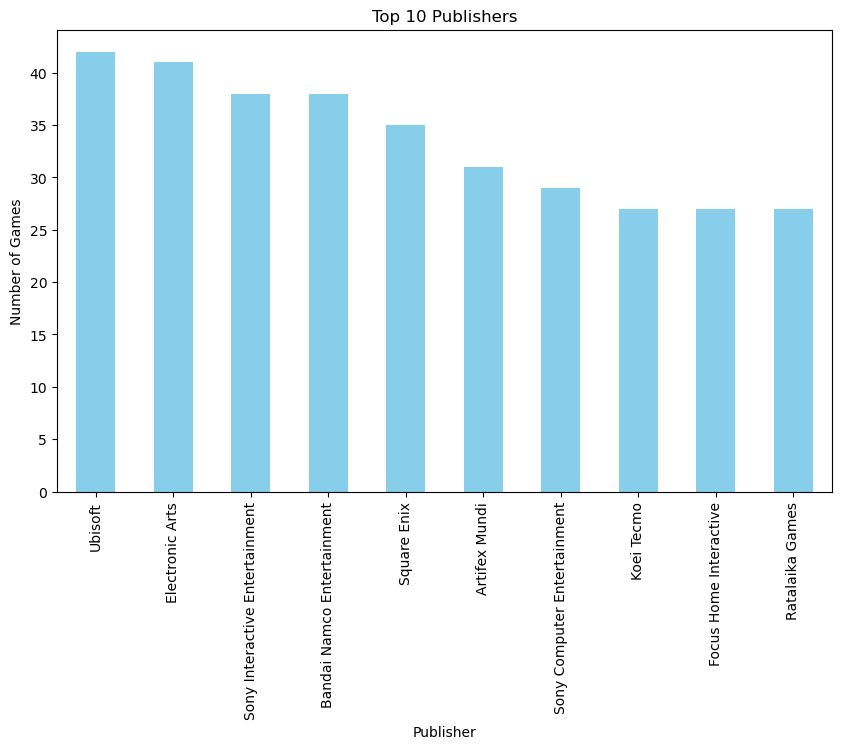

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

top_publishers = df_final['Publisher(s)'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

In This visualization, we can we the top 10 Publishers for the PlayStation 4. Ubisoft being #1 makes a lot of sense, but it is interesting to see a developer I have never seen before - Artifex Mundi, come away with the #6 spot. I want to look up their top 5 games.

In [49]:
artifex_mundi_games = df_final[df_final['Publisher(s)'] == 'Artifex Mundi']

game_ratings = artifex_mundi_games.groupby('GameName')['total_rating'].sum().reset_index()
top_5_games = game_ratings.sort_values(by='total_rating', ascending=False).head(5)

print(top_5_games)

                                      GameName  total_rating
15          Lost Grimoires 2: Shard of Mystery         90.00
7                Eventide 3: Legacy of Legends         90.00
25  Queen's Quest 2: Stories of Forgotten Past         90.00
14    Irony Curtain: From Matryoshka with Love         88.71
12               Grim Legends 3: The Dark City         74.57


I haven't heard of these games. I would like to see the boxart for Lost Grimoires 2: Shard of Mystery.

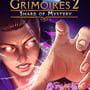

In [50]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

base_url = "https:"

cover_url = base_url + df_final[df_final['GameName'] == 'Lost Grimoires 2: Shard of Mystery']['cover'].values[0]

response = requests.get(cover_url)
img = Image.open(BytesIO(response.content))
display(img)

As you can see, we are able to use the dataset created to display the cover art as well as screenshots that are within the dataset.

## Visualization 2: Average of Game Rating

D:\Users\Jonathan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


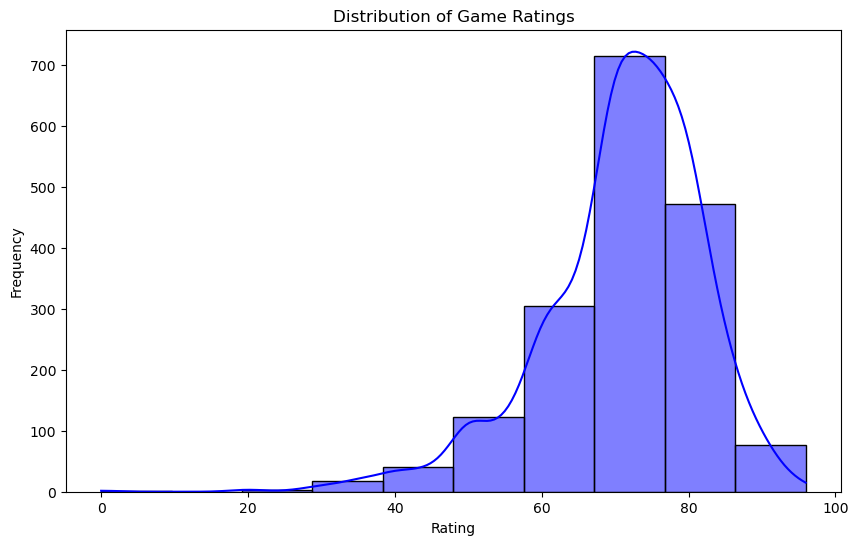

In [52]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_final['total_rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

As we can see, the average game rating for PS4 games is roughly a 70. This sounds on part for what would be the general public's opinion.

## Visualization 3: Developer Performance: Number of Games vs. Average Rating

D:\Users\Jonathan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Jonathan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


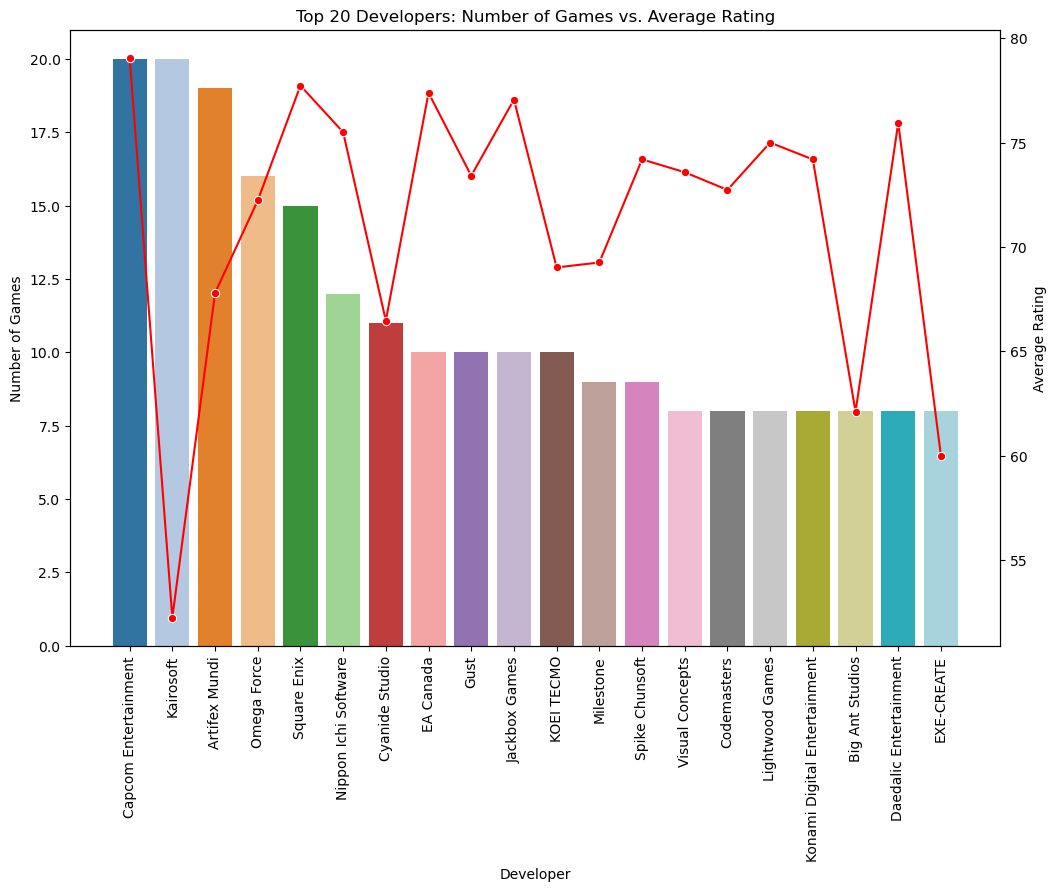

In [53]:
developer_stats = df_final.groupby('Developer').agg({'GameName': 'count', 'total_rating': 'mean'}).reset_index()
developer_stats.rename(columns={'GameName': 'Number of Games', 'total_rating': 'Average Rating'}, inplace=True)

top_20_developers = developer_stats.sort_values(by='Number of Games', ascending=False).head(20)
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x='Developer', y='Number of Games', data=top_20_developers, palette='tab20', ax=ax1)
ax1.set_ylabel('Number of Games')
ax1.set_title('Top 20 Developers: Number of Games vs. Average Rating')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()
sns.lineplot(x='Developer', y='Average Rating', data=top_20_developers, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Rating')

plt.show()

As we can see above, Capcom Entertainment has put out some great games with a large volume, at around 20 games, while Kairosoft, matching that 20 games, has put out some terrible games.

## Visualization 4: Heatmap of Top 10 Genres by Year

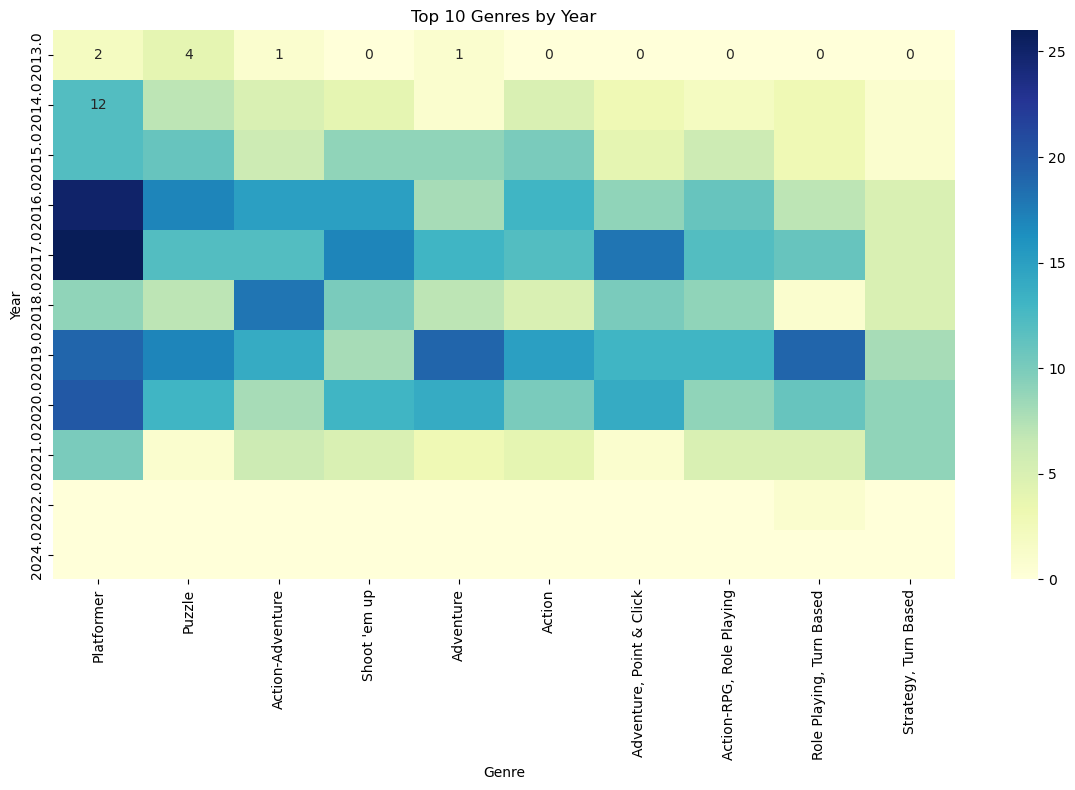

In [54]:
genre_counts = df_final.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

top_genres = genre_counts.sum().nlargest(10).index
filtered_genre_counts = genre_counts[top_genres]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_genre_counts, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Top 10 Genres by Year')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As we can see, Platformer is the most common genre, with the most of them releasing in 2016 and 2017.

## Visualization 5: Distribution of Physical vs Digital Games

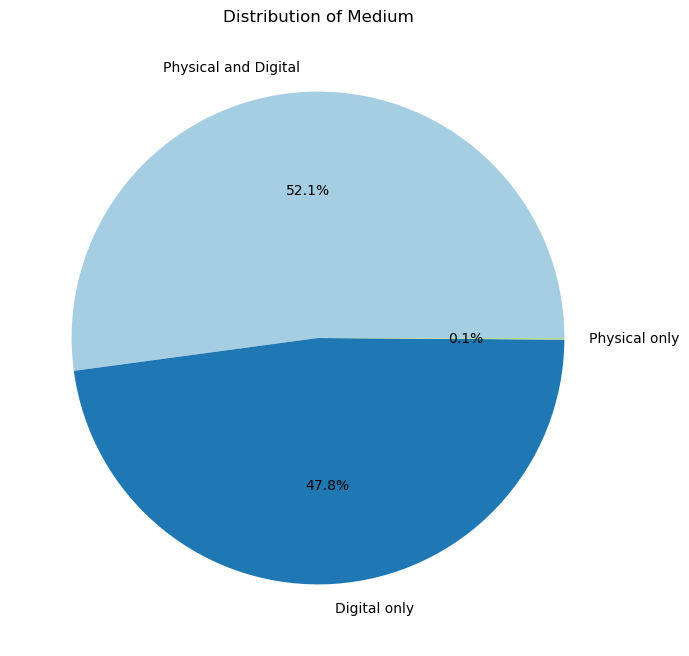

In [55]:
df_filtered = df_final[df_final['Medium'].notna() & (df_final['Medium'] != '')]
medium_counts = df_filtered['Medium'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(medium_counts, labels=medium_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(medium_counts))))
plt.title('Distribution of Medium')
plt.show()

As we can see, 47.8% of games are digital only, while only 0.1% of games are physical only. 

In [56]:
physical_only_games = df_final[df_final['Medium'] == 'Physical only']
print(physical_only_games['GameName'])

671       Guitar Hero Live
1351    Samurai Warriors 4
Name: GameName, dtype: object


It looks like out of the entire list of 1939 games, only 2 are physical only.

## Summary of Milestone 5 & Entire Project

After completing this project, I realized that there was a lot more to database management than I previously realized. Within this specific project, my Wikipedia source changed, which is completely understandable as more PS4 games are being released as time goes by. However, I did not equate for that when I originally made my project, and I had to correct some code because of it. However, this was a huge steppingstone in understanding the full scope of what data science entails – these numbers can and will fluctuate, and it is up to us to understand the process and what exactly the next steps should be to complete the task at hand. However, I gained a lot from this project as well as this entire course. Learning how to properly display visualizations, preparing data for those visualizations or other necessary outcomes, and how data is populated is of extreme importance within the data science field. I appreciate all of the tasks given and I am getting more comfortable with each task as days go by.

Within this dataset, no changes were made by to the data. This is all from the source, other than adding in key figures to be able to differentiate and properly display data. As I previously mentioned in other milestones, there are no legal or regulatory guidelines for displaying games released for the Playstation 4. I did not make any transformations to the data that could lead to any risks, but just collection for display purposes. All data was acquired ethically, and all sources were checked for corrections.

My largest takeaway from this project is the scope of what I wanted to do was lost – or, should I say, not obtainable in the way I wanted to follow. In Visualization 1, I showed cover art for the game I wanted to research. This is what I wanted to follow through with on this entire dataset. I would like to have a compilation of all games released for PS4, and information given that needs to be given. For example, I would like a similar style to this specific website: https://keeptrackofmygames.com/games/177053/lost-grimoires-2-shard-of-mystery which showcases all of the information that I would want, but more within my own dataset, such as the size, the official website, and screenshots. Hopefully, once I learn more about data science, visualizations, and other necessary requirements, I can build something that would satisfy my ultimate goal.


## Final Readable Dataset

In [57]:
df_final

,ID,GamePSID,GameName,Publisher,ReleaseYear,ReleaseDate,Developer,Genre,Features,Size,...,summary,storyline,involved_companies,themes,total_rating,created_at,updated_at,url,cover,screenshots
0,1,10294,#Funtime,The Quantum Astrophysicists Guild,2020.0,2020-07-16,OneGuyGames,Shoot 'em up,None,681.00,...,Pilot an upgradable ship through waves of phot...,None,"OneGuyGames, The Quantum Astrophysicists Guild",Action,NaN,2019-06-11 00:41:13.000000,2024-07-27 19:13:08.000000,https://www.igdb.com/games/number-funtime,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
1,6,4388,10 Second Ninja X,Curve Games,2016.0,2016-07-19,Four Circle Interactive,Platformer,PS Plus,335.00,...,"10 SECOND NINJA X is a blisteringly fast, sati...",None,"Curve Digital, Four Circle Interactive",Action,71.34,2016-04-08 11:22:17.000000,2024-08-05 19:44:14.000000,https://www.igdb.com/games/10-second-ninja-x,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/jj...
2,8,2483,1001 Spikes,Nicalis,2014.0,2014-06-03,Nicalis,Platformer,None,221.00,...,"The son of a famous adventurer, Aban Hawkins m...","""Jim Hawkins, the world-renowned archaeologist...","8bits Fanatics, Nicalis, Inc.",Action,71.20,2015-01-16 01:43:55.000000,2024-08-05 20:35:02.000000,https://www.igdb.com/games/1001-spikes,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/ax...
3,9,4646,100ft Robot Golf,No Goblin,2016.0,2016-10-10,No Goblin,"Sports, Golf",PS Now,7331.84,...,100ft Robot Golf is a real time golf game wher...,None,No Goblin,"Action, Science fiction, Comedy",59.00,2016-08-25 19:18:33.000000,2024-07-17 19:19:14.000000,https://www.igdb.com/games/100ft-robot-golf,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/kd...
4,10,4058,101 Ways to Die,Vision Games,2016.0,2016-03-22,Four Door Lemon,Puzzle,None,274.00,...,101 Ways To Die is a physics-based puzzler wit...,As the assistant to the morally corrupt Profes...,"Four Door Lemon, Vision Games Publishing","Action, Survival, Comedy, Educational",65.00,2016-01-22 15:27:30.000000,2024-08-01 19:39:20.000000,https://www.igdb.com/games/101-ways-to-die,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/pn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,6082,3084,Zombie Army Trilogy,Rebellion,2015.0,2015-03-06,Rebellion,"Action Horror, Third Person Shooter",None,9420.80,...,Zombie Army Trilogy is a third-person tactical...,In an alternative version of the final days of...,Rebellion Developments,"Action, Horror",66.86,2016-07-20 21:18:36.000000,2024-08-05 15:51:46.000000,https://www.igdb.com/games/zombie-army-trilogy,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/so...
1935,6083,10644,Zombie Driver: Immortal Edition,EXOR Studios,2020.0,2020-08-14,EXOR Studios,"Automobile, Vehicular Combat",None,2918.40,...,New and specially improved version of the zomb...,None,Exor Studios,Action,NaN,2019-07-01 09:14:18.000000,2024-08-04 01:35:36.000000,https://www.igdb.com/games/zombie-driver-immor...,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/sc...
1936,6084,3528,Zombie Vikings,Zoink!,2015.0,2015-09-01,Zoink!,Beat 'em up,PS Now,4403.20,...,Embark on a dead funny adventure with the Zomb...,Loki just snatched Odin's last magic eye right...,"Zoink Games, Rising Star Games","Action, Fantasy, Horror, Comedy",61.76,2015-10-26 11:44:22.000000,2024-08-05 20:31:34.000000,https://www.igdb.com/games/zombie-vikings,//images.igdb.com/igdb/image/upload/t_thumb/co...,//images.igdb.com/igdb/image/upload/t_thumb/ca...
1937,6090,3826,Zotrix,UFO Interactive,2015.0,2015-12-08,ZeroBit Games,Shoot 'em up,PS Now,179.00,...,Zotrix is a modern take on the classic arcade ...,None,"ZeroBit Games, Ocean Media",Action,42.00,2016-09-03 